## Import images

In [1]:
using Images
using DataFrames

function read_data(typeData, labelsInfo, imageSize, path)
    #Intialize x matrix
    x = float32(zeros(size(labelsInfo, 1), imageSize))

    for (index, idImage) in enumerate(labelsInfo[:ID]) 
        #Read image file 
        nameFile = "$(path)/$(typeData)Resized/$(idImage).Bmp"
        img = imread(nameFile)

        #Convert img to float values 
        temp = convert(Array{Gray}, img)

        #Transform image matrix to a vector and store 
        #it in data matrix 
        x[index, :] = reshape(temp, 1, imageSize)
    end 
    return x
end

    +(AbstractArray{T,N},DataArray{T,N}) at /Users/quetzal/.julia/v0.3/DataArrays/src/operators.jl:326
is ambiguous with: 
    +(AbstractImageDirect{T,N},AbstractArray{T,N}) at /Users/quetzal/.julia/v0.3/Images/src/algorithms.jl:17.
To fix, define 
    +(AbstractImageDirect{T,N},DataArray{T,N})
before the new definition.
    +(AbstractArray{T,N},AbstractDataArray{T,N}) at /Users/quetzal/.julia/v0.3/DataArrays/src/operators.jl:349
is ambiguous with: 
    +(AbstractImageDirect{T,N},AbstractArray{T,N}) at /Users/quetzal/.julia/v0.3/Images/src/algorithms.jl:17.
To fix, define 
    +(AbstractImageDirect{T,N},AbstractDataArray{T,N})
before the new definition.
    -(AbstractArray{T,N},DataArray{T,N}) at /Users/quetzal/.julia/v0.3/DataArrays/src/operators.jl:326
is ambiguous with: 
    -(AbstractImageDirect{T,N},AbstractArray{T,N}) at /Users/quetzal/.julia/v0.3/Images/src/algorithms.jl:31.
To fix, define 
    -(AbstractImageDirect{T,N},DataArray{T,N})
before the new definition.
    -(AbstractA

read_data (generic function with 1 method)

In [2]:
imageSize = 400 # 20 x 20 pixel

#Set location of data files, folders
path = "data"

#Read information about training data , IDs.
labelsInfoTrain = readtable("$(path)/trainLabels.csv")

#Read training matrix
xTrain = read_data("train", labelsInfoTrain, imageSize, path)

#Read information about test data ( IDs ).
labelsInfoTest = readtable("$(path)/sampleSubmission.csv")

#Read test matrix
xTest = read_data("test", labelsInfoTest, imageSize, path)

6220x400 Array{Float32,2}:
 0.447059  0.435294  0.443137   0.439216   …  0.894118  0.627451  0.466667
 0.278431  0.270588  0.27451    0.286275      0.380392  0.317647  0.294118
 0.109804  0.113725  0.0941177  0.0901961     0.184314  0.105882  0.101961
 0.592157  0.592157  0.580392   0.596078      0.592157  0.580392  0.588235
 0.501961  0.490196  0.505882   0.521569      0.14902   0.435294  0.537255
 0.54902   0.552941  0.545098   0.545098   …  0.333333  0.305882  0.498039
 0.137255  0.141176  0.133333   0.141176      0.133333  0.152941  0.152941
 0.858824  0.862745  0.870588   0.882353      0.886275  0.894118  0.882353
 0.705882  0.709804  0.705882   0.686275      0.752941  0.733333  0.698039
 0.866667  0.858824  0.854902   0.831373      0.176471  0.301961  0.905882
 0.227451  0.317647  0.396078   0.407843   …  0.231373  0.239216  0.235294
 0.733333  0.776471  0.776471   0.776471      0.776471  0.780392  0.776471
 0.47451   0.470588  0.478431   0.482353      0.47451   0.466667  0.47451

In [3]:
#Get only first character of string (convert from string to character).
#Apply the function to each element of the column "Class"
tup = map(x -> (x, int(x[1])-1), labelsInfoTrain[:Class])
dict = Dict(unique(tup))

#Convert from character to integer
yTrain = map(x -> x[2], tup)

6283-element DataArray{Any,1}:
 109
  55
  83
  72
  81
  86
  75
 107
  74
  70
  64
  64
  66
   ⋮
 115
  82
 100
 107
  78
  81
  75
  77
  72
  79
  77
  81

In [14]:
using DecisionTree
using Iterators
NTREES=[50, 100, 250, 500]
NFEATURES = [10,20,30]
KFOLD = 5

hyperParams = (Float64, Tuple)[]
for (nf, nt) in product(NFEATURES, NTREES)
    print("Running $(KFOLD)-FOLD CV for hyperparameter set: NFEATURES=$(nf), NTREES=$(nt)")
    acc = nfoldCV_forest(yTrain, xTrain, nf, nt, KFOLD)
    push!(hyperParams, (mean(acc), (nf, nt)))
end

bestParams = maximum(hyperParams)

Running 5-FOLD CV for hyperparameter set: NFEATURES=10, NTREES=50

LoadError: `nfoldCV_forest` has no method matching nfoldCV_forest(::DataArray{Any,1}, ::Array{Float32,2}, ::Int64, ::Int64, ::Int64)
while loading In[14], in expression starting on line 8

In [45]:
ar = map(x -> [x[2][1], x[2][2], x[1]]', hyperParams)
tuning = convert(DataFrame, reduce(vcat, ar))

,x1,x2,x3
1,10.0,50.0,0.40859872611464976
2,20.0,50.0,0.42245222929936316
3,30.0,50.0,0.4356687898089172
4,10.0,100.0,0.43312101910828027
5,20.0,100.0,0.4468152866242038
6,30.0,100.0,0.4579617834394904
7,10.0,250.0,0.45015923566878985
8,20.0,250.0,0.4705414012738854
9,30.0,250.0,0.47627388535031845
10,10.0,500.0,0.46289808917197456


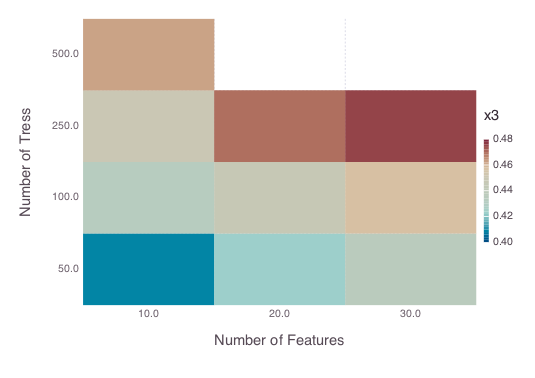

In [46]:
using Gadfly
plot(tuning, x="x1", y="x2", color="x3", Scale.x_discrete, Scale.y_discrete, Guide.xlabel("Number of Features"), Guide.ylabel("Number of Tress"), Geom.rectbin)


## Train best model

In [60]:
model = build_forest(yTrain, xTrain, bestParams[2][1], bestParams[2][2])

Ensemble of Decision Trees
Trees:      250
Avg Leaves: 1712.752
Avg Depth:  18.044

In [61]:
#Get predictions for test data
predTest = apply_forest(model, xTest)

#Convert integer predictions to character
labelsInfoTest[:Class] = char(predTest)

#Save predictions
writetable("$(path)/juliaSubmission.csv", labelsInfoTest, separator=',', header=true)

## Deep Learning

### Convert data to HDF5 format

In [4]:
using HDF5

function convert_to_HDF5(typeData, labelsInfo, dict, imageSize, path)
    w, h, c = imageSize
    n = length(labelsInfo[:ID])
    x = float32(zeros(w,h,c,n))
    for (index, idImage) in enumerate(labelsInfo[:ID]) 
        #Read image file 
        nameFile = "$(path)/$(typeData)Resized/$(idImage).Bmp"
        img = imread(nameFile)

        #Convert img to float values 
        x[:,:,:,index] = reshape(convert(Array{Gray}, img), w, h, c)
    end 
    
    HDF5.h5open("$(path)/$(typeData).hdf5", "w") do h5
        dset_data = d_create(h5, "data", datatype(Float32), dataspace(w, h, c, n))
        dset_data[:,:,:,:] =  x
        
        dset_label = d_create(h5, "label", datatype(Float32), dataspace(1,n))
        dset_label[1,:] = map(k -> dict[k], labelsInfo[:Class])
    end
    
end

convert_to_HDF5 (generic function with 1 method)

In [5]:
convert_to_HDF5("train", labelsInfoTrain, dict, (20, 20, 1), path)
convert_to_HDF5("test", labelsInfoTest, dict, (20, 20, 1), path)

6220-element DataArray{Any,1}:
 64
 64
 64
 64
 64
 64
 64
 64
 64
 64
 64
 64
 64
  ⋮
 64
 64
 64
 64
 64
 64
 64
 64
 64
 64
 64
 64

### Perceptron neural net

In [56]:
function compute_dim(wh, kernel=(1,1), stride=(1,1), pad=(0,0))
    width_out  = div(wh[1] + 2*pad[1]-kernel[1], stride[1]) + 1
    height_out = div(wh[2] + 2*pad[2]-kernel[2], stride[2]) + 1
    return width_out, height_out
end

compute_dim (generic function with 4 methods)

In [57]:
compute_dim((20,20), (5,5), (4,4), (0, 0))

(4,4)

In [47]:
use_gpu = false
ENV["MOCHA_USE_NATIVE_EXT"] = "false"
N = length(unique(labelsInfoTrain[:Class]))
base_dir = "snapshots_dropout_fc"

using Mocha
srand(333)

data_layer  = HDF5DataLayer(name="train-data", source="data/train.txt", batch_size=1)
# each fully connected layer uses a ReLU activation and a constraint on the L2 norm of the weights
fc1_layer   = InnerProductLayer(name="fc1", output_dim=1200, neuron=Neurons.ReLU(),
                                weight_init = GaussianInitializer(std=0.01),
                                bottoms=[:data], tops=[:fc1])
fc2_layer   = InnerProductLayer(name="fc2", output_dim=1200, neuron=Neurons.ReLU(),
                                weight_init = GaussianInitializer(std=0.01),
                                weight_cons = L2Cons(4.5),
                                bottoms=[:fc1], tops=[:fc2])
fc3_layer   = InnerProductLayer(name="out", output_dim=N, bottoms=[:fc2],
                                weight_init = ConstantInitializer(0),
                                weight_cons = L2Cons(4.5),
                                tops=[:out])
loss_layer  = SoftmaxLossLayer(name="loss", bottoms=[:out,:label])

# setup dropout for the different layers
# we use 20% dropout on the inputs and 50% dropout in the hidden layers
# as these values were previously found to be good defaults
drop_input  = DropoutLayer(name="drop_in", bottoms=[:data], ratio=0.2)
drop_fc1 = DropoutLayer(name="drop_fc1", bottoms=[:fc1], ratio=0.5)
drop_fc2  = DropoutLayer(name="drop_fc2", bottoms=[:fc2], ratio=0.5)

backend = use_gpu ? GPUBackend() : CPUBackend()
init(backend)

common_layers = [fc1_layer, fc2_layer, fc3_layer]
drop_layers = [drop_input, drop_fc1, drop_fc2]
# put training net together, note that the correct ordering will automatically be established by the constructor
net = Net("SV-train", backend, [data_layer, common_layers..., drop_layers..., loss_layer])
println(net)

13-Aug 17:03:11:INFO:root:Constructing net SV-train on CPUBackend...
13-Aug 17:03:11:INFO:root:Topological sorting 8 layers...
13-Aug 17:03:11:INFO:root:Setup layers...
13-Aug 17:03:11:INFO:root:Network constructed!
************************************************************
          NAME: SV-train
       BACKEND: CPUBackend
  ARCHITECTURE: 8 layers
............................................................
 *** HDF5DataLayer(train-data)
    Outputs ---------------------------
          data: Blob(20 x 20 x 1 x 1)
         label: Blob(1 x 1)
............................................................
 *** DropoutLayer(drop_in)
    Inputs ----------------------------
          data: Blob(20 x 20 x 1 x 1)
............................................................
 *** InnerProductLayer(fc1)
    Inputs ----------------------------
          data: Blob(20 x 20 x 1 x 1)
    Outputs ---------------------------
           fc1: Blob(1200 x 1)
............................................

In [49]:
# we let the learning rate decrease by 0.998 in each epoch (=600 batches of size 100)
# and let the momentum increase linearly from 0.5 to 0.9 over 500 epochs
# which is equivalent to an increase step of 0.0008
# training is done for 2000 epochs
params = SolverParameters(max_iter=600*2000, regu_coef=0.0,
                          mom_policy=MomPolicy.Linear(0.5, 0.0008, 100, 0.9),
                          lr_policy=LRPolicy.Step(0.1, 0.998, 100),
                          load_from=base_dir)
solver = SGD(params)

setup_coffee_lounge(solver, save_into="$base_dir/statistics.jld", every_n_iter=5000)

# report training progress every 100 iterations
add_coffee_break(solver, TrainingSummary(), every_n_iter=100)

# save snapshots every 5000 iterations
add_coffee_break(solver, Snapshot(base_dir), every_n_iter=5000)

# show performance on test data every 600 iterations (one epoch)
data_layer_test = HDF5DataLayer(name="test-data", source="data/test.txt", batch_size=1)
acc_layer = AccuracyLayer(name="test-accuracy", bottoms=[:out, :label], report_error=true)
test_net = Net("SV-test", backend, [data_layer_test, common_layers..., acc_layer])
add_coffee_break(solver, ValidationPerformance(test_net), every_n_iter=600)

solve(solver, net)

destroy(net)
destroy(test_net)
shutdown(backend)

13-Aug 17:04:40:INFO:root:Constructing net SV-test on CPUBackend...
13-Aug 17:04:40:INFO:root:Topological sorting 5 layers...
13-Aug 17:04:40:INFO:root:Setup layers...
13-Aug 17:04:40:DEBUG:root:InnerProductLayer(fc1): sharing weights and bias
13-Aug 17:04:40:DEBUG:root:InnerProductLayer(fc2): sharing weights and bias
13-Aug 17:04:40:DEBUG:root:InnerProductLayer(out): sharing weights and bias
13-Aug 17:04:40:INFO:root:Network constructed!
13-Aug 17:04:40:DEBUG:root:Checking network topology for back-propagation
13-Aug 17:04:40:DEBUG:root:Init network SV-train
13-Aug 17:04:40:DEBUG:root:Initializing coffee breaks
13-Aug 17:04:40:INFO:root:Snapshot directory snapshots_dropout_fc already exists
13-Aug 17:04:40:DEBUG:root:Init network SV-test
13-Aug 17:04:40:INFO:root:ITER = 000000:: TRAIN obj-val = 4.12713432
13-Aug 17:04:40:INFO:root:Saving snapshot to snapshot-000000.jld...
13-Aug 17:04:40:DEBUG:root:Saving parameters for layer fc1
13-Aug 17:04:40:DEBUG:root:Saving parameters for layer 

LoadError: BoundsError()
while loading In[49], in expression starting on line 25

In [45]:
destroy(net)
destroy(test_net)
shutdown(backend)

13-Aug 17:02:44:DEBUG:root:Destroying network SV-train
13-Aug 17:02:44:DEBUG:root:Destroying network SV-test


Dict{String,Array{AbstractParameter,1}} with 0 entries